In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/khadijab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/khadijab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/khadijab/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
import pandas as pd
import re # for regular expressions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
# Load the small English model for spaCy
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.5 MB/s eta 0:00:00a 0:00:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
# Set pandas to display full text for better inspection
pd.set_option('display.max_colwidth', None)

# Load the dataset from the CSV file
try:
    df = pd.read_csv('/home/khadijab/Downloads/IMDB Dataset.csv')
except FileNotFoundError:
    print("Error: 'dataset.csv' not found. Make sure it's in the same folder as this notebook.")

# Display the first 5 rows and some info
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [5]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())


Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [7]:
# Get the list of English stop words
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [8]:
def preprocess_text(text):
    """
    Cleans and preprocesses a single text string.
    1. Removes HTML tags
    2. Lowercases text
    3. Removes punctuation and numbers
    4. Tokenizes text
    5. Removes stop words
    6. Lemmatizes words
    """
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization is often better than stemming
    text = ' '.join(tokens)
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    return ' '.join(lemmatized_tokens)

In [9]:
print("preprocessing all 50,000 reviews... this may take a while ")
df = df.sample(500).copy() #use .copy() to avoid SettingWithCopyWarningy 
df["cleaned_review"] = df['review'].apply(preprocess_text)
print("preprocessing complete!")

# Display a comparison of original vs. cleaned review
print("\nComparing Original vs. Cleaned Review:")
display(df[['review', 'cleaned_review']].head())

preprocessing all 50,000 reviews... this may take a while 


preprocessing complete!

Comparing Original vs. Cleaned Review:


,review,cleaned_review
33350,"Night of the Demons is a great movie and an excellent example of how good low-budget can be. Sure, much of it is fairly predictable, but somehow it's still much more enjoyable than the crap we see these days being passed off as ""Horror"". I give the gore a solid 9, and the Demons' one-liners are actually funny. I'm still creeped out by ""Stop looking at me!"" The soundtrack is well done, I was surprised to hear ""Stigmata Martyr"" from Bauhaus! There is also some very nice T&A on display, as well as some hella good make-up effects. The second film in the series is pretty good too, but avoid the inferior third one. Night of the Demons may be dated, dark, and low-rent, but it still has a lot of potential. It's definitely worth a rental at least. Give it a chance tonight, just stay away from any old makeup! (you'll understand when you see it!)",night demon great movie excellent example good lowbudget sure much fairly predictable somehow still much enjoyable crap see day pass horror give gore solid demon oneliner actually funny I m still creep stop look soundtrack well do surprised hear stigmata martyr bauhaus also nice ta display well hella good makeup effect second film series pretty good avoid inferior third one night demon may date dark lowrent still lot potential definitely worth rental least give chance tonight stay away old makeup you ll understand see
39854,"Fantastic Russian WWII movie. Like most Russian WWII movies, The Ascent is incredibly harrowing. It's also dense in its symbolism. The story follows two partisans, Sotnikov and Rybak (Boris Plotnikov and Vladimir Gostyukhin), who go on a mission to search for food. On their trip, they are spotted by German soldiers, who wound Sotnikov. Sotnikov, in turn, kills one of the Germans, which leads to trouble for the two partisans and everyone else they later run into. The greatest success of the film is its vivid sense of place. Russia is frozen and snowy, and it's hard not to feel that cold go straight to your own bones. Shepitko keeps her shot close to the characters, examining every crag of their faces. It was probably not the choice, but the film is framed 1.33:1, which gives the film a sense of claustrophobia. While the entire film is quite an achievement, I did feel that the first half was stronger than the second. My main complaint about the movie is that it develops into a very unsubtle Christian allegory by its climax. I just don't think the symbolism adds much to the proceedings, especially when I was already intrigued by the debate between the two partisans. It's not quite fair. I was weighing the pros and cons of their argument. I began to lean toward the point of view of a certain character, and then the director pops up and tells me that he's Judas! Despite some heavy-handedness, this is still a must-see.",fantastic russian wwii movie like russian wwii movie ascent incredibly harrowing also dense symbolism story follow two partisan sotnikov rybak boris plotnikov vladimir gostyukhin go mission search food trip spot german soldier wound sotnikov sotnikov turn kill one german lead trouble two partisan everyone else later run great success film vivid sense place russia frozen snowy hard feel cold go straight bone shepitko keeps shoot close character examine every crag face probably choice film frame give film sense claustrophobia entire film quite achievement feel first half strong second main complaint movie develop unsubtle christian allegory climax do not think symbolism add much proceeding especially already intrigue debate two partisan quite fair weigh pro con argument begin lean toward point view certain character director pop tell he s judas despite heavyhandedness still mustsee
14558,"Shakespeare Behind Bars was the most surprising and delightful film I've seen all year. It's about a prison program, somewhere in California if I recall correctly, where the inmates have rehearsed and performed a different Shakespeare play every 

In [10]:
from sklearn.model_selection import train_test_split

df["sentiment_numeric"] = df["sentiment"].map({"positive": 1, "negative": 0})

#Define our features (X) and target (Y)
X = df["cleaned_review"]
Y = df["sentiment_numeric"]

#Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures the train/test split has the same proportion of sentiments as the original dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 400
Testing set size: 100


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
# max_features=5000 means we only use the 5000 most common words, which is efficient
tfidf = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf.fit_transform(X_train)

# ONLY transform the test data using the already-fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

print(f"Shape of the training TF-IDF matrix: {X_train_tfidf.shape}")
print(f"Shape of the testing TF-IDF matrix: {X_test_tfidf.shape}")

Shape of the training TF-IDF matrix: (400, 5000)
Shape of the testing TF-IDF matrix: (100, 5000)


In [12]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
# solver='liblinear' is a good choice for this type of problem
model = LogisticRegression(solver='liblinear')
model.fit(X_train_tfidf, Y_train)

print("Model training complete!")

Model training complete!


In [13]:
def predict_sentiment(text):
    """
    Takes a raw text string and predicts its sentiment using the trained model.
    """
    # 1. Preprocess the text using the same function from Cell 2
    cleaned_text = preprocess_text(text)
    
    # 2. Vectorize the text using the SAME fitted TF-IDF vectorizer from Cell 5
    vectorized_text = tfidf.transform([cleaned_text])
    
    # 3. Predict using the trained model from Cell 6
    prediction = model.predict(vectorized_text)
    
    # 4. Return the human-readable result
    return 'Positive' if prediction[0] == 1 else 'Negative'

# --- Test Cases ---
review_1 = "This movie was absolutely fantastic! The acting was superb and the plot was gripping."
review_2 = "I was so bored throughout the entire film. It was a complete waste of time and money."
review_3 = "The film was okay, not great but not terrible either. Some parts were good."

print(f"Review: '{review_1}'\nPredicted Sentiment: {predict_sentiment(review_1)}\n")
print(f"Review: '{review_2}'\nPredicted Sentiment: {predict_sentiment(review_2)}\n")
print(f"Review: '{review_3}'\nPredicted Sentiment: {predict_sentiment(review_3)}\n")

Review: 'This movie was absolutely fantastic! The acting was superb and the plot was gripping.'
Predicted Sentiment: Positive

Review: 'I was so bored throughout the entire film. It was a complete waste of time and money.'
Predicted Sentiment: Negative

Review: 'The film was okay, not great but not terrible either. Some parts were good.'
Predicted Sentiment: Positive



Model Accuracy: 0.8300

Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.69      0.80        49
    Positive       0.77      0.96      0.85        51

    accuracy                           0.83       100
   macro avg       0.86      0.83      0.83       100
weighted avg       0.85      0.83      0.83       100



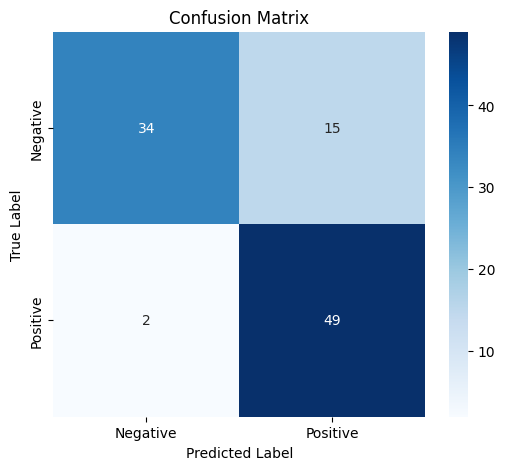

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
